<a href="https://colab.research.google.com/github/jesschannn/datasci_5_statistics/blob/main/data_5_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy
from scipy.stats import chi2_contingency as chi2
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Chi Square

**Null Hypothesis**: There is no association between the brand name of a medication and indications for anti-psychotics (flagged as yes or no).

**Alternative Hypothesis**: There is an association between the brand name of a medication and indications for anti-psychotics (flagged as yes or no).

**Interpretation**: The purpose of a chi-squared test is to measure how a model compared to observed data and whether the difference between expected and observed data is due to chance or if there's a relationship. Because the chi-square value derived from my calculations is significantly greater than the chi-square value that is expected, the null hypothesis has to be rejected.

In [ ]:
df1= pd.read_csv('medicare_prescriber.csv')
df1

<ipython-input-4-49e1bc531a88>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1= pd.read_csv('medicare_prescriber.csv')


,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,Brnd_Name,Gnrc_Name,Tot_Prscrbrs,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Benes,...,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,LIS_Bene_Cst_Shr,NonLIS_Bene_Cst_Shr,Opioid_Drug_Flag,Opioid_LA_Drug_Flag,Antbtc_Drug_Flag,Antpsyct_Drug_Flag
0,National,NaN,National,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1178,3708,6598.5,102280.76,1313.0,...,5385.3,79992.58,NaN,1052.0,4167.66,22903.26,N,N,N,N
1,National,NaN,National,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1604,4564,7905.6,131927.33,1766.0,...,6603.0,106683.88,NaN,1450.0,4415.22,20335.83,N,N,N,N
2,National,NaN,National,Abacavir,Abacavir Sulfate,3560,30534,37402.4,7039482.37,4252.0,...,19275.5,3547013.16,NaN,2141.0,21278.04,186025.79,N,N,N,N
3,National,NaN,National,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,2933,30248,38810.9,9656849.77,4030.0,...,22159.0,5457642.63,NaN,2272.0,23576.53,376349.75,N,N,N,N
4,National,NaN,National,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,38,118,120.0,146795.20,32.0,...,74.0,91779.21,NaN,19.0,1488.48,3939.47,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114886,State,9E,Foreign Country,Zaleplon,Zaleplon,2,18,18.0,315.49,NaN,...,18.0,315.49,*,NaN,0.00,61.47,N,N,N,N
114887,State,9E,Foreign Country,Zarxio,Filgrastim-Sndz,1,40,40.0,34498.72,15.0,...,40.0,34498.72,NaN,15.0,5.00,8815.21,N,N,N,N
114888,State,9E,Foreign Country,Ziprasidone Hcl,Ziprasidone Hcl,5,55,67.0,6356.96,11.0,...,NaN,NaN,*,NaN,50.68,78.84,N,N,N,Y
114889,State,9E,Foreign Country,Zolpidem Tartrate,Zolpidem Tartrate,13,110,134.3,1143.03,48.0,...,95.3,638.81,NaN,35.0,54.32,420.37,N,N,N,N


In [ ]:
df1['Brnd_Name'].value_counts()

Insulin Syringe                232
Sure Comfort                   213
Veo Insulin Syringe            212
Safetyglide Insulin Syringe    192
Sodium Chloride                178
                              ... 
Bethkis                          1
Gonitro                          1
Salex                            1
Vesicare Ls                      1
Paregoric                        1
Name: Brnd_Name, Length: 3408, dtype: int64

In [ ]:
df1['Antpsyct_Drug_Flag'].value_counts()

N    112186
Y      2705
Name: Antpsyct_Drug_Flag, dtype: int64

In [ ]:
contingency_table = pd.crosstab(df1['Brnd_Name'], df1['Antpsyct_Drug_Flag'])
print(contingency_table)

Antpsyct_Drug_Flag               N   Y
Brnd_Name                             
1st Tier Unifine Pentips        23   0
1st Tier Unifine Pentips Plus   39   0
Abacavir                        53   0
Abacavir-Lamivudine             51   0
Abacavir-Lamivudine-Zidovudine   5   0
...                             ..  ..
Zyprexa                          6  45
Zyprexa Relprevv                11  27
Zyprexa Zydis                   12  22
Zytiga                          50   0
Zyvox                            7   0

[3408 rows x 2 columns]


In [ ]:
chi2, p, _, _ = scipy.stats.chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 108965.52624078517
P-value: 0.0


# T-Test

**Null Hypothesis**: The average radius for malignant breast cancer cell nuclei is not different from benign breast cancer cell nuclei.

**Alternative Hypothesis**: The average radius for malignant breast cancer cell nuclei is different from benign breast cancer cell nuclei.

**Interpretation**: The purpose of the t-test is to determine if there is a significant difference between the means of two groups and how they are related. Since the p-value is much smaller than 0.05, the null hypothesis is rejected.

In [ ]:
df2 = pd.read_csv('breast_cancer.csv')
df2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
malignant_data = df2[df2['diagnosis'] == 'M']['radius_mean']
print(malignant_data)

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
563    20.92
564    21.56
565    20.13
566    16.60
567    20.60
Name: radius_mean, Length: 212, dtype: float64


In [ ]:
malignant_data_mean = malignant_data.mean()
malignant_data_mean

17.462830188679245

In [ ]:
benign_data = df2[df2['diagnosis'] == 'B']['radius_mean']
print(benign_data)

19     13.540
20     13.080
21      9.504
37     13.030
46      8.196
        ...  
558    14.590
559    11.510
560    14.050
561    11.200
568     7.760
Name: radius_mean, Length: 357, dtype: float64


In [ ]:
benign_data_mean = benign_data.mean()
print(benign_data_mean)

12.146523809523808


In [ ]:
t_stat, p_val = ttest_ind(malignant_data, benign_data, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 22.208797758464527
P-value: 1.6844591259582747e-64


In [ ]:
malignant_mean = malignant_data.mean()
benign_mean = benign_data.mean()

print(f"Mean radius for malignant breast cancer nuclei: {malignant_mean}")
print(f"Mean radius for benign breast cancer nuclei: {benign_mean}")

Mean radius for malignant breast cancer nuclei: 17.462830188679245
Mean radius for benign breast cancer nuclei: 12.146523809523808


# ANOVA

**Null Hypothesis**: The average readmission rates do not differ across different states.

**Alternative Hypothesis**: The average readmission rates differ across different states.

**Interpretation**: The purpose of the ANOVA test is to allow for a comparison of more than two groups at the same time to determine if there's a relationship between them. Because the p-value is way smaller than 0.05, the null hypothesis is rejected.

In [ ]:
df3 = pd.read_csv('readmission.csv')
df3

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,1.0301,4.5819,4.4481,Too Few to Report,07/01/2018,06/30/2021
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,202.0,NaN,0.9903,19.1885,19.3765,38,07/01/2018,06/30/2021
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,319.0,NaN,0.9958,14.4888,14.5498,46,07/01/2018,06/30/2021
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,437.0,NaN,0.9568,17.0029,17.7701,71,07/01/2018,06/30/2021
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,757.0,NaN,1.0551,23.0374,21.8333,178,07/01/2018,06/30/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
18985,ST MICHAELS MEDICAL HOSPITAL LLC,670314,TX,READM-30-HIP-KNEE-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2018,06/30/2021
18986,ST MICHAELS MEDICAL HOSPITAL LLC,670314,TX,READM-30-HF-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2018,06/30/2021
18987,ST MICHAELS MEDICAL HOSPITAL LLC,670314,TX,READM-30-COPD-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2018,06/30/2021
18988,ST MICHAELS MEDICAL HOSPITAL LLC,670314,TX,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2018,06/30/2021


In [ ]:
df3.columns = df3.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()

In [ ]:
df3 = df3[df3['number_of_discharges'] != 'state']

In [ ]:
model = ols('number_of_discharges ~ C(state)', data=df3).fit()

In [ ]:
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq      df        F        PR(>F)
C(state)  2.047276e+07    50.0  6.27876  4.128835e-39
Residual  6.056960e+08  9288.0      NaN           NaN


# Regression Analysis

**Null Hypothesis**: The body mass index (BMI) of a patient does not predict a patient's charges.

**Alternative Hypothesis** The body mass index (BMI) of a patient does predict a patient's charges.

**Interpretation**: The purpose of the regression analysis is to determine the degree of which the independent variable affects the dependent variable. The direction is positive meaning that as the independent variable increases, the dependent variable increase as well. The R-squared value of 0.089 indicates a weak fit meaning that BMI is not a good indicator of charges a patient can incur.

In [ ]:
df4 = pd.read_csv('insurance.csv')
df4

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
X = df4[['age']]
y = df4[['charges']]

In [ ]:
model = LinearRegression().fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

In [ ]:
print(f"Slope (Coefficient for Age): {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_squared}")

Slope (Coefficient for Age): [257.72261867]
Intercept: [3165.88500606]
R-squared value: 0.08940589967885804


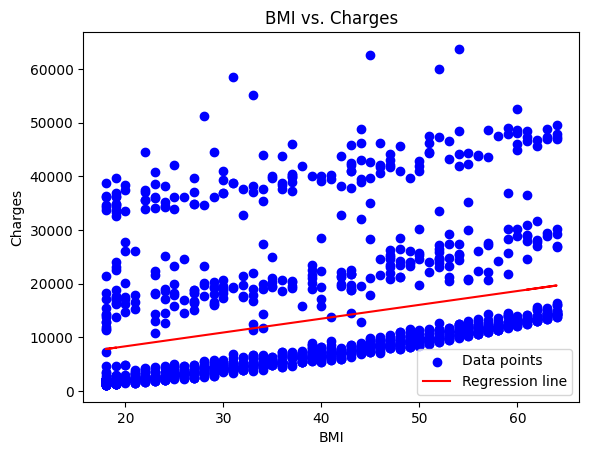

In [ ]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()